"Geo Data Science with Python" 
### Notebook Lesson 06d

# Python Packages: Download data from the Web II

This lesson discusses several smaller Python Modules useful to download and retrieve Geoscience data from the internet. 

### Sources
This notebook is contains information from the following resources:

NetCDF
- NetCDF Module: https://unidata.github.io/netcdf4-python/

---

---
## CODE EXAMPLE 0: Download the Gistemp file again

In [1]:
# 1. Import the module
import requests

In [2]:
# 2. Define the URL
url = 'https://data.giss.nasa.gov/pub/gistemp/gistemp250_GHCNv4.nc.gz'
filename = 'gistemp250_GHCNv4.nc.gz'

In [3]:
# 3. Use requests.get() to download the data behind that URL
r = requests.get(url, allow_redirects=True, stream=True)  

In [4]:
# 4. Write the file to a new file on your computer
open(filename, 'wb').write(r.content)  #the previous two in one line

11034247

In [5]:
# Unzip the file: bash command
!gunzip -f -k {filename} # unpacks the file, 
                         # -f forces command & overwrites files
                         # -k keeps both files .gz and unzipped one
# Information on gunzip: https://www.tutorialspoint.com/unix_commands/gunzip.htm

---
## CODE EXAMPLES 1: Working with NetCDF4 files

In [6]:
# switch environtment if needed:
# %%bash
# source activate OOD-GEOFALL
# conda env list

In [7]:
# Check, if installation of netCDF4 is available
from netCDF4 import Dataset
# and conda environment is correct
#!conda env list

### Import the data

In [8]:
filename = 'gistemp250_GHCNv4.nc'
data = Dataset(filename, mode='r')

### Explore the data (Tutorial 1)

In [9]:
# object type of the netcdf4 Dataset
type(data)

netCDF4._netCDF4.Dataset

In [10]:
# look into the netcdf4 Dataset
print(data)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: GISTEMP Surface Temperature Analysis
    institution: NASA Goddard Institute for Space Studies
    source: http://data.giss.nasa.gov/gistemp/
    Conventions: CF-1.6
    history: Created 2021-10-11 08:03:29 by SBBX_to_nc 2.0 - ILAND=250,  IOCEAN=none,     Base: 1951-1980
    dimensions(sizes): lat(90), lon(180), time(1701), nv(2)
    variables(dimensions): float32 lat(lat), float32 lon(lon), int32 time(time), int32 time_bnds(time, nv), int16 tempanomaly(time, lat, lon)
    groups: 


In [11]:
# call attribute `variables`
data.variables

{'lat': <class 'netCDF4._netCDF4.Variable'>
 float32 lat(lat)
     standard_name: latitude
     long_name: Latitude
     units: degrees_north
 unlimited dimensions: 
 current shape = (90,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'lon': <class 'netCDF4._netCDF4.Variable'>
 float32 lon(lon)
     standard_name: longitude
     long_name: Longitude
     units: degrees_east
 unlimited dimensions: 
 current shape = (180,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'time': <class 'netCDF4._netCDF4.Variable'>
 int32 time(time)
     long_name: time
     units: days since 1800-01-01 00:00:00
     bounds: time_bnds
 unlimited dimensions: 
 current shape = (1701,)
 filling on, default _FillValue of -2147483647 used,
 'time_bnds': <class 'netCDF4._netCDF4.Variable'>
 int32 time_bnds(time, nv)
 unlimited dimensions: 
 current shape = (1701, 2)
 filling on, default _FillValue of -2147483647 used,
 'tempanomaly': <class 'netCDF4._netCDF4.Variable'>
 int16 te

In [12]:
# call attibute `dimensions`
data.dimensions

{'lat': <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 90,
 'lon': <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 180,
 'time': <class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 1701,
 'nv': <class 'netCDF4._netCDF4.Dimension'>: name = 'nv', size = 2}

### Retrieve info for variable and dimension content (Tutorial 2)

In [13]:
# retrieve list of available variables in data
print ('Available variables: ')
print ([e for e in data.variables])

Available variables: 
['lat', 'lon', 'time', 'time_bnds', 'tempanomaly']


In [14]:
# retrieve list of available dimension names 
print ('Available dimension names: ')
print ([e for e in data.dimensions])

# retrieve list of available dimension values
print ('Available dimension values: ')
print ([data.dimensions[e].size for e in data.dimensions])

Available dimension names: 
['lat', 'lon', 'time', 'nv']
Available dimension values: 
[90, 180, 1701, 2]


### Retrieve info for individual variables (Tutorial 3)

In [15]:
# printing info on variable 'lat'
data.variables['lat'] 

<class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
    standard_name: latitude
    long_name: Latitude
    units: degrees_north
unlimited dimensions: 
current shape = (90,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [16]:
# printing info on variable 'lon'
data.variables['lon']

<class 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
    standard_name: longitude
    long_name: Longitude
    units: degrees_east
unlimited dimensions: 
current shape = (180,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [17]:
# printing info on variable 'tempanomaly'
data.variables['tempanomaly']

<class 'netCDF4._netCDF4.Variable'>
int16 tempanomaly(time, lat, lon)
    long_name: Surface temperature anomaly
    units: K
    scale_factor: 0.01
    cell_methods: time: mean
    _FillValue: 32767
unlimited dimensions: 
current shape = (1701, 90, 180)
filling on

In [18]:
data.variables['tempanomaly'].long_name

'Surface temperature anomaly'

In [19]:
data.variables['tempanomaly'].units

'K'

In [20]:
data.variables['tempanomaly']._FillValue

32767

### Retrieve variable content (Tutorial 4)

In [21]:
data.variables['tempanomaly'][:]
data.variables['lon'][:]
# retrieves masked array
# the case for some netcdf variables
# for lat, lon, mask is empty

masked_array(data=[-179., -177., -175., -173., -171., -169., -167., -165.,
                   -163., -161., -159., -157., -155., -153., -151., -149.,
                   -147., -145., -143., -141., -139., -137., -135., -133.,
                   -131., -129., -127., -125., -123., -121., -119., -117.,
                   -115., -113., -111., -109., -107., -105., -103., -101.,
                    -99.,  -97.,  -95.,  -93.,  -91.,  -89.,  -87.,  -85.,
                    -83.,  -81.,  -79.,  -77.,  -75.,  -73.,  -71.,  -69.,
                    -67.,  -65.,  -63.,  -61.,  -59.,  -57.,  -55.,  -53.,
                    -51.,  -49.,  -47.,  -45.,  -43.,  -41.,  -39.,  -37.,
                    -35.,  -33.,  -31.,  -29.,  -27.,  -25.,  -23.,  -21.,
                    -19.,  -17.,  -15.,  -13.,  -11.,   -9.,   -7.,   -5.,
                     -3.,   -1.,    1.,    3.,    5.,    7.,    9.,   11.,
                     13.,   15.,   17.,   19.,   21.,   23.,   25.,   27.,
                     29.,

In [22]:
type(data.variables['tempanomaly'][:])

numpy.ma.core.MaskedArray

In [23]:
type(data.variables['lon'][:])

numpy.ma.core.MaskedArray

In [24]:
# Check if variable lon contains a mask container (true)
data.variables['lon'].mask

True

In [26]:
# Check if the mask container is filled (false)
data.variables['lon'][:].mask

False

### Retrieve variable content (Tutorial 5)

In [27]:
# reference only the data array with:
lon = data.variables['lon'][:].data

In [28]:
# content is a numpy array
type(lon)

numpy.ndarray

In [29]:
# writing content of all other interesting variables in data to separate numpy arrays
lat = data.variables['lat'][:].data
time = data.variables['time'][:].data
anom = data.variables['tempanomaly'][:].data
mask = data.variables['tempanomaly'][:].mask

In [30]:
import numpy # need to import numpy now, if you have not done so before
print("Size of longitude array:",lon.shape)
print("Size of latitude array:",lat.shape)
print("Size of time array:",time.shape)
print("Size of data array:",anom.shape)
print("Size of data mask array:",mask.shape)

Size of longitude array: (180,)
Size of latitude array: (90,)
Size of time array: (1701,)
Size of data array: (1701, 90, 180)
Size of data mask array: (1701, 90, 180)


In [31]:
print("Type of longitude array:",lon.dtype)
print("Type of latitude array:",lat.dtype)
print("Type of time array:",time.dtype)
print("Type of data array:",anom.dtype)
print("Type of data mask array:",mask.dtype)

Type of longitude array: float32
Type of latitude array: float32
Type of time array: int32
Type of data array: float32
Type of data mask array: bool


### Examples for working with netCDF4 time values

In [32]:
# time vector is in netCDF numbers, integer values
time

array([29233, 29264, 29293, ..., 80914, 80945, 80976], dtype=int32)

In [33]:
# Recive unit of the time vector in data
data.variables['time'].units

'days since 1800-01-01 00:00:00'

In [34]:
# convert the netcdf time values to a date with num2date
from netCDF4 import num2date
unts = data.variables['time'].units
time_dates = num2date(time,unts)  # string: 'days since 1800-01-01 00:00:00'
time_dates

array([cftime.DatetimeGregorian(1880, 1, 15, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(1880, 2, 15, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(1880, 3, 15, 0, 0, 0, 0, has_year_zero=False),
       ...,
       cftime.DatetimeGregorian(2021, 7, 15, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2021, 8, 15, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2021, 9, 15, 0, 0, 0, 0, has_year_zero=False)],
      dtype=object)

In [35]:
# date is given in netCDF's cftimec class:
type(time_dates[0])

cftime._cftime.DatetimeGregorian

In [40]:
# receive a cftime data as string
time_dates[1].strftime()
# alternatively:
#str(time_dates[1])

'1880-02-15 00:00:00'

In [41]:
# convert cftime dates to netcdf time values with date2num
from netCDF4 import date2num
date2num(time_dates,unts)

array([29233, 29264, 29293, ..., 80914, 80945, 80976])

In [43]:
# convert datetime dates to netcdf time values with date2num
from datetime import datetime
date2num(datetime(2021, 9, 15),unts)

80976

In [44]:
# convert datetime date to an index corresponding to netcdf time unit
from netCDF4 import date2index
from datetime import datetime
timeindex = date2index(datetime(2021, 1, 15),data.variables['time'])
timeindex

1692

### Close the data object

In [45]:
# closing the netCDF file
data.close()

---
## CODE EXAMPLES 2: Plotting data with matplotlib

### Plotting the data (Tutorial 6)


This netcdf file contains records from 1880-01-15 00:00:00 to 2021-09-15 00:00:00


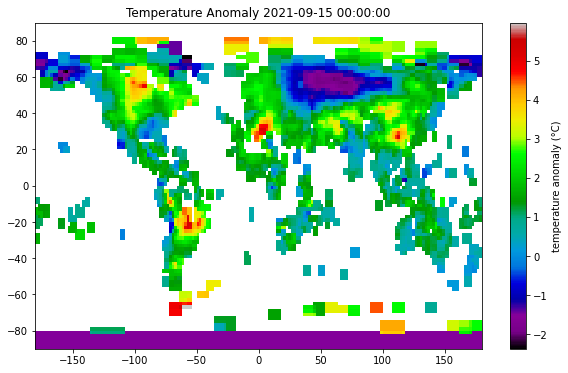

In [71]:
# %load gistemp_plot.py
"""
Created on Mon Oct 12 18:54:30 2021
@author: swerth
"""
import matplotlib.pyplot as plt
import numpy as np
import netCDF4
from netCDF4 import Dataset
from netCDF4 import date2index
from datetime import datetime


# read netcdf file
data = Dataset('gistemp250_GHCNv4.nc')

# Get index for a certain month, read this month from the data below
year = 2021
month = 9
timeindex = date2index(datetime(year, month, 15),
                       data.variables['time'])




# read data 
# --------
###  complete the code here
###  read lat, lon, time and anomaly into numpy arrays
###  read tempanomaly for month defined above
###  replace fill values with np.nan

# solution
# --------
###  complete the code here
###  read lat, lon, time into numpy arrays
lat = data.variables['lat'][:].data
lon = data.variables['lon'][:].data
time = data.variables['time'][:].data

###  read tempanomaly (for month defined above) into numpy array
anom = data.variables['tempanomaly'][timeindex].data
anom_mask = data.variables['tempanomaly'][timeindex].mask

###  replace fill values
fillVal = data.variables['tempanomaly']._FillValue
anom[anom==fillVal] = np.nan



# plot data 
# --------

# converting the 1D coordinate arrays to a meshgrid
lonGrid, latGrid = np.meshgrid(lon,lat)

# plot data into map
fig = plt.figure(figsize=(10, 6))

# plotting the first last map in the time series
plt.pcolormesh(lonGrid,latGrid, anom, shading='auto',cmap='nipy_spectral') 
# try other colorbars: hot, hot_r, cool


# adding a colorbar and title
plt.title('Temperature Anomaly ' + str(datetime(year, month, 15)))
plt.colorbar(label=('temperature anomaly (' + u'\N{DEGREE SIGN}' + 'C)'))

# add plot limits
#plt.clim(-8, 8)


# get available time period in netcdf file and write to screen
t_units = data.variables['time'].units
time_beg = netCDF4.num2date(data.variables['time'][0],t_units)
time_end = netCDF4.num2date(data.variables['time'][-1],t_units)
print('\nThis netcdf file contains records from ' + str(time_beg) +
      ' to ' + str(time_end))

### Plotting the mask

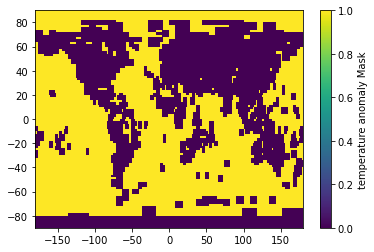

In [52]:
plt.pcolormesh(lonGrid,latGrid, anom_mask, shading='auto') 
plt.colorbar(label=('temperature anomaly Mask'))

### Calculate global tem mean at each time, plot a time series (Tutorial 7)

In [54]:
# read netcdf dataset again
data = Dataset('gistemp250_GHCNv4.nc')

# retrieve data for all time steps, set empty values to nan
anomAll = data.variables['tempanomaly'][:].data
anomAll[anomAll==fillVal] = np.nan

In [56]:
# getting the number of months in the dataset (we know its 24)
NoOfMonths = len(time)     

In [57]:
# creating a numpy array of the same length, containing zeros
monthlyMeanAnom = np.zeros(NoOfMonths) 

In [58]:
# iterating over each month in a for-loop: estimating mean 'tos' over the globe
for t in range(NoOfMonths):            
    # using nanmean to make sure nan values are ignored
    monthlyMeanAnom[t] = np.nanmean(anomAll[t]) 

Text(0, 0.5, 'Temperature (Celsius)')

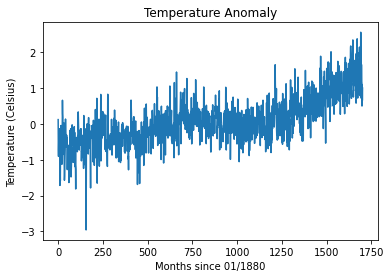

In [59]:
# plotting the time series of mean 'tos' (over the entire globe)
plt.plot(range(NoOfMonths),monthlyMeanAnom)

# adding labels
plt.title("Temperature Anomaly")
plt.xlabel('Months since 01/1880')
plt.ylabel('Temperature (Celsius)')